In [6]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib notebook 

In [88]:
#pull out bcd meme
table = []
with open('../../data/fimo_out/fimo.gff') as f:
    for line in f:  
        if not line.startswith('##'):
            broken = line.split('\t')
            pattern = broken[8].split(';')[3]
            qval = float(broken[8].split(';')[4].strip()[7:])
            pval = float(pattern[7:].strip())
            #TF = broken[8].split(';')[0][5:]
            gene = broken[0]
            stuff = (gene, qval, pval)
            table.append(stuff)
            
df= pd.DataFrame(table, columns=['gene', 'q-value', 'p-value'])
df.head()
        

,gene,q-value,p-value
0,chr2L,1.0,0.000005
1,chr2L,1.0,0.000005
2,chr2L,1.0,0.000005
3,chr2L,1.0,0.000005
4,chr2L,1.0,0.000005


In [89]:
df2= df['q-value']
df2.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: q-value, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook 


sb.distplot(df2)

#ax.axvline(0.05, color='r', ls=':')

<IPython.core.display.Javascript object>

In [56]:
#remove unneeded chrom
IN_GOODCHROM = False
#goodchrom_vals = []
with open('../../data/phastcon_trim.wig', 'w+') as outfile:
    with open('../../data/dm6.27way.phastCons.wigFix') as p: 
        for line in p: 
            if line.startswith('fixedStep'):
                chrom = line.split()[1].split('=')[1]
                if '_' not in chrom: 
                    IN_GOODCHROM = True
                    outfile.write(line)
                if '_' in chrom:
                    IN_GOODCHROM = False
            else: 
                if IN_GOODCHROM:
                    outfile.write(line)

In [57]:
print(chromlist)

['chr2L', 'chr2R', 'chr3L', 'chr3R', 'chr4', 'chrM', 'chrX', 'chrY']


In [82]:
#put fasta file in wig order
IN_GOODCHROM = False
IN_XY = False
xylist = []
fastalist =[]
with open('../../data/dmel_r6-11_trim.fasta', 'w+') as outfile:
    with open('../../data/dmel_r6-11.fasta') as f:
        for line in f: 
            if line.startswith('>'):
                chrom = line.split()[0].split('>')[1]
                if chrom in chromlist:
                    if chrom == 'chrX' or chrom == 'chrY': 
                        IN_XY = True 
                        IN_GOODCHROME = False
                        xylist.append(line)
                    else: 
                        IN_GOODCHROM = True
                        IN_XY = False
                        fastalist.append(line)
                else:
                    IN_GOODCHROM = False
                    IN_XY = False
            else: 
                if IN_GOODCHROM:
                    fastalist.append(line)
                if IN_XY: 
                    xylist.append(line)
    fastalist.append(xylist)
    for item in fastalist: 
        outfile.writelines(item)
    


In [63]:
fastalist =[]
with open('../../data/dmel_r6-11_trim.fasta', 'w+') as outfile:
    with open('../../data/dmel_r6-11.fasta') as f:
        for line in f: 
            if line.startswith('>'):
                chrom = line.split()[0].split('>')[1]
                if chrom not in fastalist:
                    fastalist.append(chrom)
#print(fastalist)

['chr2L', 'chr2R', 'chr3L', 'chr3R', 'chr4', 'chrX', 'chrY', 'chrUn_CP007071v1', 'chrUn_CP007072v1', 'chrUn_CP007073v1', 'chrUn_CP007074v1', 'chrUn_CP007075v1', 'chrUn_CP007076v1', 'chrUn_CP007077v1', 'chrUn_CP007078v1', 'chrUn_CP007079v1', 'chrUn_CP007080v1', 'chrUn_CP007081v1', 'chrUn_CP007082v1', 'chrUn_CP007083v1', 'chrUn_CP007084v1', 'chrUn_CP007085v1', 'chrUn_CP007086v1', 'chrUn_CP007087v1', 'chrUn_CP007088v1', 'chrUn_CP007089v1', 'chrUn_CP007090v1', 'chrUn_CP007091v1', 'chrUn_CP007092v1', 'chrUn_CP007093v1', 'chrUn_CP007094v1', 'chrUn_CP007095v1', 'chrUn_CP007096v1', 'chrUn_CP007097v1', 'chrUn_CP007098v1', 'chrUn_CP007099v1', 'chrUn_CP007100v1', 'chrUn_CP007101v1', 'chrUn_CP007102v1', 'chrX_CP007103v1_random', 'chrX_CP007104v1_random', 'chrUn_CP007105v1', 'chrY_CP007107v1_random', 'chrY_CP007108v1_random', 'chrY_CP007109v1_random', 'chrY_CP007110v1_random', 'chrY_CP007111v1_random', 'chrY_CP007112v1_random', 'chrY_CP007113v1_random', 'chrY_CP007114v1_random', 'chrY_CP007115v1_ra

In [13]:
import pandas as pd
import seaborn as sb

table = []
with open('../../data/fimo_out/fimo.gff') as f:
    for line in f:  
        if not line.startswith('##'):
            broken = line.split('\t')
            pattern = broken[8].split(';')[3]
            qval = float(broken[8].split(';')[4].strip()[7:])
            pval = float(pattern[7:].strip())
            TF = broken[8].split(';')[0][5:].split('_')[0]
            gene = broken[0]
            stuff = (TF, gene, qval, pval)
            table.append(stuff)
            
df= pd.DataFrame(table, columns=['TF','gene', 'q-value', 'p-value'])
df.head()

chr2L	fimo	nucleotide_motif	7386	7391	38.4	-	.	Name=ap_chr2L-;Alias=;ID=ap-1-chr2L;pvalue=0.000145;qvalue= 0.581;sequence=AATAAT;



,TF,gene,q-value,p-value


<IPython.core.display.Javascript object>


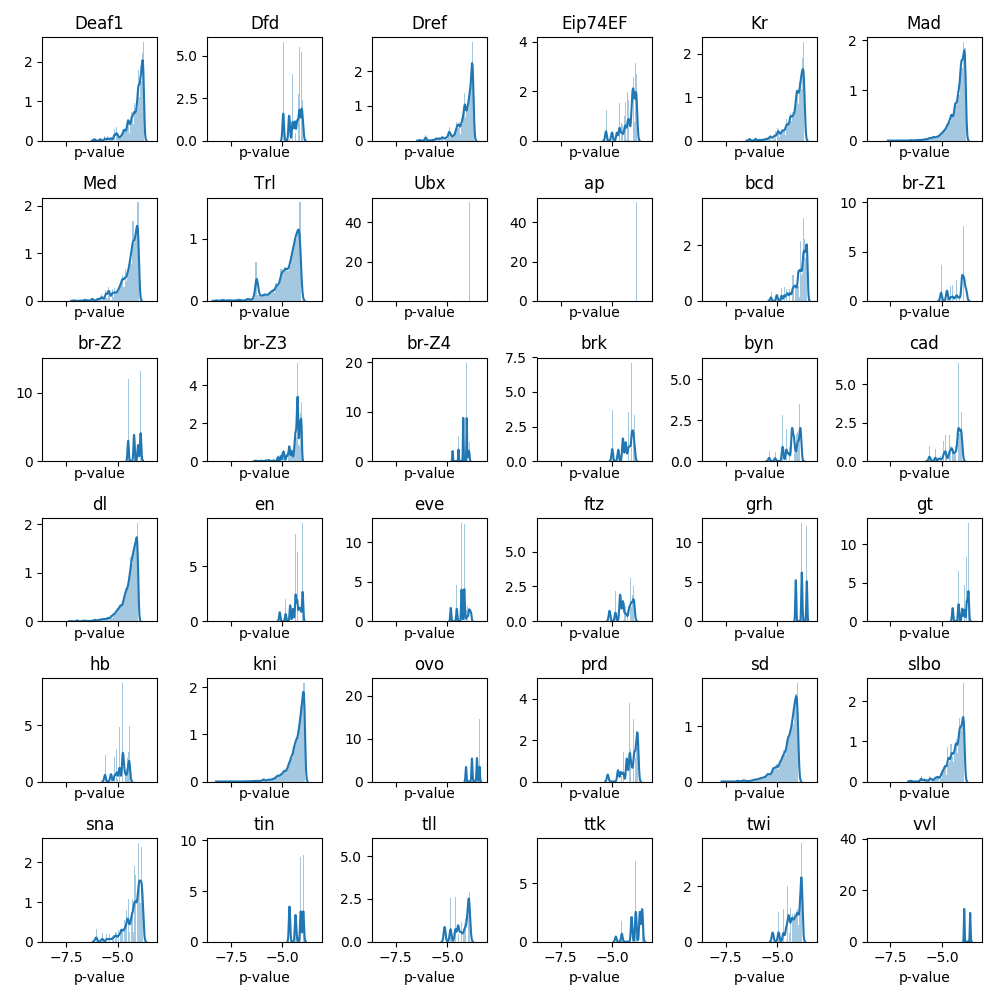

/Users/bergeric/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/bergeric/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


In [12]:
indexTF = df.set_index(['TF'])
df2 = df[["TF","q-value","p-value"]]
df3 = df[['TF', 'gene', 'p-value']]
groups = df2.groupby(['TF'])
x= groups['p-value']

fig, axes = plt.subplots(6,6, figsize=(10,10), sharex=True)
#axr = axes.ravel()

#zip(groups, axes.flatten())
for ax, x in zip(axes.flat, x):
    sb.distplot(np.log10(x[1]), ax=ax)
    ax.set_title(x[0])
    #ax.axvline(0.05, color='r', ls=':')
    #axes.flat[-1].set_visible(False)
#ax.set_xlim(0,2)
plt.tight_layout()